In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

lowess = sm.nonparametric.lowess

print('read files')
path= 'figura_1/sin_colesterol/'

RMSD = os.listdir(path)
RMSD = sorted(RMSD,key=len)

sim_RMSD_df=pd.DataFrame({})
n=0

for i in tqdm(RMSD):
    if(i.split('.')[-1]=='xvg'):
        
        nombre=i.split('minim')[1].split('.')[0]


        with open(path+i) as f:
            data = f.read()
            data = data.split('\n')
        sim_temp=[]
        
        for i in range(len(data[18:])-1):
            valor=float(data[18:][i][15:])
            sim_temp.append(valor)
        
        sim_RMSD_df.insert(n,'Rmsd'+str(nombre),sim_temp)  
        n=n+1


print('lowess files')



  0%|          | 0/20 [00:00<?, ?it/s]

read files


100%|██████████| 20/20 [00:02<00:00,  7.06it/s]

lowess files


/Users/neurobotics/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/neurobotics/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<Figure size 720x360 with 0 Axes>

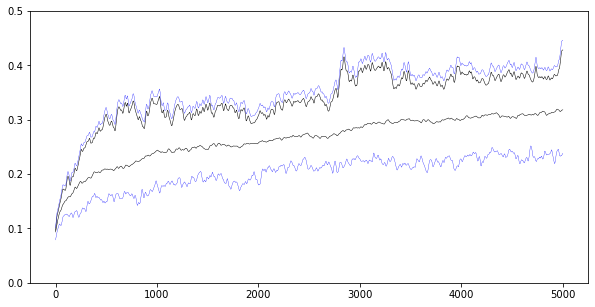

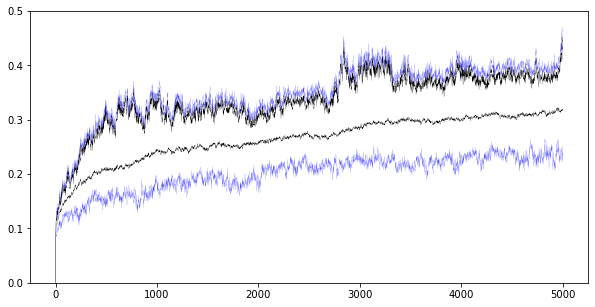

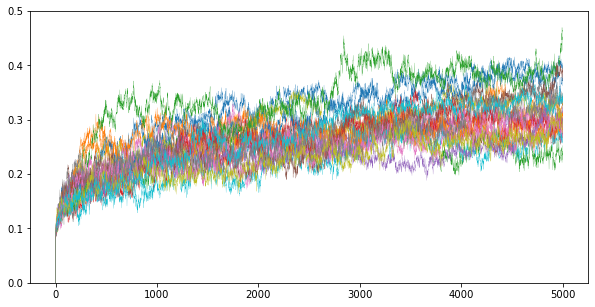

In [3]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

DATA=np.array(sim_RMSD_df)

plt.figure(figsize=(10, 5))

data_gau=[]
data_gau_min=[]
data_gau_max=[]
data_prom=[]

for i in range(5001):
    samples = DATA[i]
    bins = np.linspace(-DATA[i].min(),DATA[i].max(), 20)
    histogram, bins = np.histogram(samples, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    data_gau.append(bin_centers.max())
    data_gau_min.append(DATA[i].min())
    data_gau_max.append(DATA[i].max())
    data_prom.append(sum(samples)/20)
    
def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))
    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)

lw=5

data_lowest=smooth_data_lowess(data_gau,lw)
data_lowest_min=smooth_data_lowess(data_gau_min,lw)
data_lowest_max=smooth_data_lowess(data_gau_max,lw)
data_lowest_prom=smooth_data_lowess(data_prom,lw)

plt.figure(figsize=(10,5))
plt.plot(data_lowest,color='k',linewidth=0.5)
plt.plot(data_lowest_prom,color='k',linewidth=0.5)
plt.plot(data_lowest_min,color='blue',linewidth=0.3)
plt.plot(data_lowest_max,color='blue',linewidth=0.3)
plt.ylim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data_gau,color='k',linewidth=0.2)
plt.plot(data_prom,color='k',linewidth=0.2)
plt.plot(data_gau_min,color='blue',linewidth=0.1)
plt.plot(data_gau_max,color='blue',linewidth=0.1)
plt.ylim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(sim_RMSD_df,linewidth=0.2)
plt.ylim(0,0.5)

plt.show()

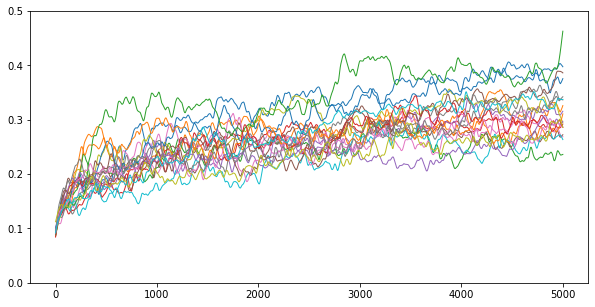

In [8]:
lw=10
plt.figure(figsize=(10,5))

for i in sim_RMSD_df:
    data_lowest=smooth_data_lowess(sim_RMSD_df[i],lw)
    plt.plot(data_lowest,linewidth=1)
plt.ylim(0,0.5)

plt.show()

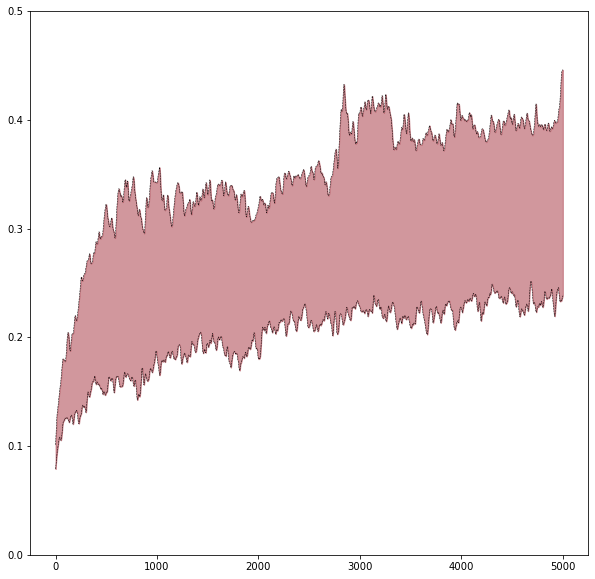

In [12]:
import matplotlib.pyplot as plt
import numpy as np


x=np.arange(5001)

plt.figure(figsize=(10,10))

plt.plot(x,data_lowest_max,'k--',linewidth=0.5)
plt.plot(x,data_lowest_min,'k--',linewidth=0.5)
plt.fill_between(x,data_lowest_max,data_lowest_min, color='#a4303d',alpha=0.5)
plt.ylim(0,0.5)

plt.show()

In [4]:

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import statistics

DATA=np.array(sim_RMSD_df)

plt.figure(figsize=(10, 5))


data_gau=[]
data_gau_mode=[]
data_gau_min=[]
data_gau_max=[]
data_prom=[]

for i in range(5001):
    
    samples = DATA[i]
    
    bins = np.linspace(-DATA[i].min(),DATA[i].max(), 20)
    histogram, bins = np.histogram(samples, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    
    
    data_gau.append(bin_centers.max())

    
    data_gau_mode.append(statistics.median(samples))
    data_gau_min.append(DATA[i].min())
    data_gau_max.append(DATA[i].max())
    data_prom.append(sum(samples)/20)
    

def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))
    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)

lw=5


data_lowest=smooth_data_lowess(data_gau,lw)
data_lowest_min=smooth_data_lowess(data_gau_min,lw)
data_lowest_max=smooth_data_lowess(data_gau_max,lw)
data_lowest_prom=smooth_data_lowess(data_prom,lw)
data_lowest_mode=smooth_data_lowess(data_gau_mode,lw)


x=np.arange(5001)


/Users/neurobotics/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/neurobotics/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<Figure size 720x360 with 0 Axes>

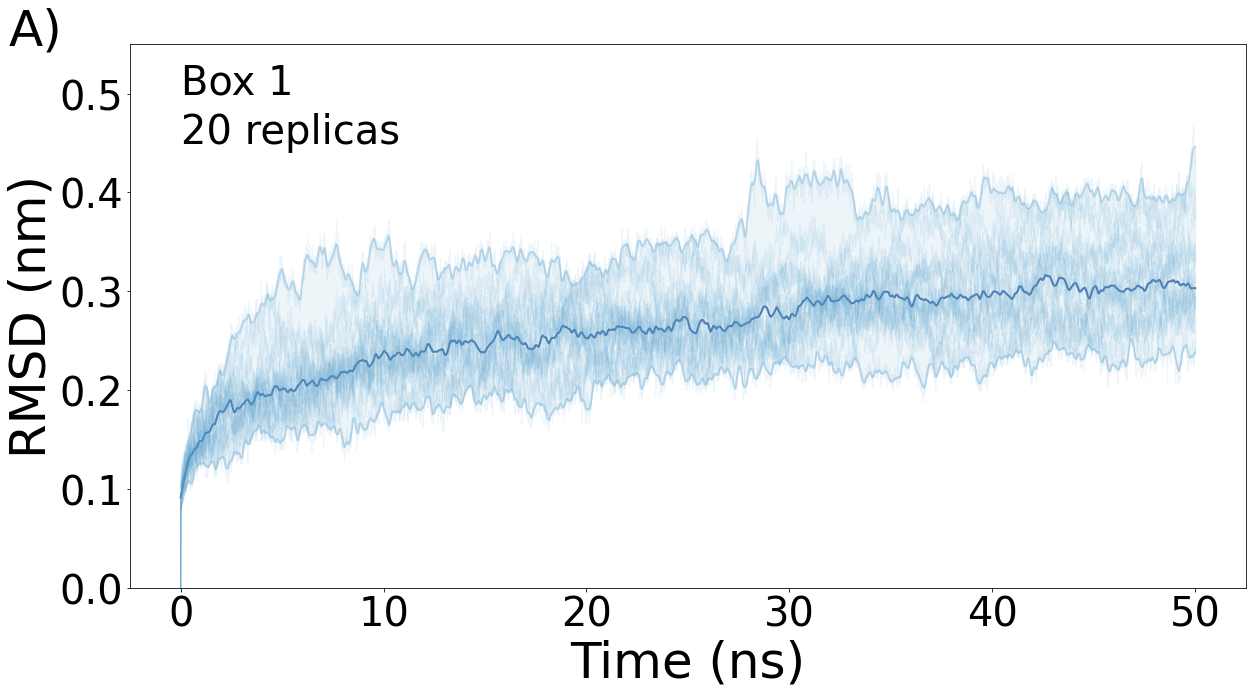

In [20]:
plt.figure(figsize=(20,10))
txt=50
plt.plot(x,data_lowest_max,linewidth=2,color='#539ecd',alpha=0.3)
plt.plot(x,data_lowest_min,linewidth=2,color='#539ecd',alpha=0.3)

plt.fill_between(x,data_lowest_max,data_lowest_min ,color='#539ecd',alpha=0.1)

#plt.plot(x,data_lowest,'k-',linewidth=2,color='#255599',alpha=0.8)
plt.plot(x,data_lowest_mode,'k-',linewidth=2,color='#255599',alpha=0.8)

plt.plot(sim_RMSD_df,linewidth=1,color='#539ecd',alpha=0.1)
plt.ylim(0,0.55)

plt.rcParams.update({'font.size': 40})


plt.xlabel('Time (ns)', fontsize=txt)
plt.ylabel('RMSD (nm)', fontsize=txt)

plt.text(- 850, 0.55, 'A)',fontsize=txt)

#plt.suptitle('RMSD', fontsize=30)
#plt.title("Protein after lsq fit to Protein", fontsize=25)

plt.text(0, 0.5, 'Box 1',fontsize=40)
plt.text(0, 0.45, '20 replicas',fontsize=40)
my_xticks = ['0','10','20','30','40','50']
plt.xticks([0,1000,2000,3000,4000,5000], my_xticks, fontsize=40)
plt.savefig('f1_sin_col.pdf',dpi=1000)
plt.show()